In [3]:
# importamos las librerías que necesitamos
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Hoy tenemos un dataset nuevo, en este encontraremos las siguientes columnas:

GDP: Producto Interno Bruto, el valor total de bienes y servicios producidos en el país.

Gross primary education enrollment (%): Tasa bruta de matriculación en educación primaria.

Gross tertiary education enrollment (%): Tasa bruta de matriculación en educación terciaria.

Infant mortality: Número de muertes por cada 1,000 nacidos vivos antes de cumplir un año de edad.

Largest city: Nombre de la ciudad más grande del país.

Life expectancy: Número promedio de años que se espera que viva un recién nacido.

Maternal mortality ratio: Número de muertes maternas por cada 100,000 nacidos vivos.

Minimum wage: Nivel de salario mínimo en moneda local.

Official language: Idioma(s) oficial(es) hablado(s) en el país.

Out of pocket health expenditure: Porcentaje del gasto total en salud pagado directamente por individuos.

Physicians per thousand: Número de médicos por cada mil personas.

Population: Población total del país.

Population: Labor force participation (%): Porcentaje de la población que forma parte de la fuerza laboral.

Tax revenue (%): Ingresos fiscales como porcentaje del PIB.

Total tax rate: Carga fiscal total como porcentaje de las ganancias comerciales.

Unemployment rate: Porcentaje de la fuerza laboral que está desempleada.

Urban_population: Porcentaje de la población que vive en áreas urbanas.

coordinates: Coordenadas de latitud y longitud de la ubicación del país.

country: Nombre del país.

Todas deben llevar título.

Los nombres de los ejes deben estar en castellano.

En los scatterplot los puntos deben tener un tamaño de 2.

En los scatterplot los puntos deben tener un color diferente al azul.

En los barplot las barras siempre tienen que estar ordenadas de mayor a menor.

En los barplot y countplot las barras tienen que tener un color diferente a los que vienen por defecto.

En los pieplot siempre tenemos que añadir la etiqueta de a que % corresponde cada quesito.

In [5]:
df = pd.read_csv("world_data_full_apply_nul.csv", index_col = 0) 
df.sample(5)

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
60,France,119.0,FR,52.4,643.801,307.0,11.30,33.0,Paris,303.276,110.05,1.1,EUR,1.88,31.2,1.39,2.715518e+12,102.5,65.6,3.4,Paris,82.5,8.0,11.16,French,6.8,3.27,NaN,55.1,24.2,60.7,8.43,NaN,46.227638,2.213749,Europe
170,Syria,95.0,SY,75.8,185.180,239.0,23.69,963.0,Damascus,28.830,143.20,36.7,SYP,2.81,2.7,0.83,4.040501e+10,81.7,40.1,14.0,Damascus,71.8,31.0,1.02,Arabic,53.7,1.22,NaN,44.1,14.2,42.7,8.37,NaN,34.802075,38.996815,Asia
21,Bosnia and Herzegovina,64.0,BA,43.1,51.197,11.0,8.11,387.0,Sarajevo,21.848,104.90,0.6,BAM,1.27,42.7,1.05,2.004785e+10,NaN,23.3,5.0,Tuzla Canton,77.3,10.0,1.04,Bosnian,28.6,2.16,NaN,46.4,20.4,23.7,18.42,NaN,43.915886,17.679076,Europe
142,Romania,84.0,RO,58.8,238.391,126.0,9.60,40.0,Bucharest,69.259,123.78,3.8,RON,1.71,30.1,1.16,2.500774e+11,85.2,49.4,6.1,Bucharest,75.4,19.0,2.25,Romanian,21.3,2.98,NaN,54.7,14.6,20.0,3.98,NaN,45.943161,24.966760,Europe
72,Haiti,414.0,HT,66.8,27.750,0.0,24.35,509.0,Port-au-Prince,2.978,179.29,12.5,HTG,2.94,3.5,0.81,8.498982e+09,113.6,1.1,49.5,Port-au-Prince,63.7,480.0,0.25,French,36.3,0.23,NaN,67.2,NaN,42.7,13.78,NaN,18.971187,-72.285215,Central America


¿Cómo se distribuye la tasa de natalidad en el conjunto de datos? ¿Hay algún patrón evidente?

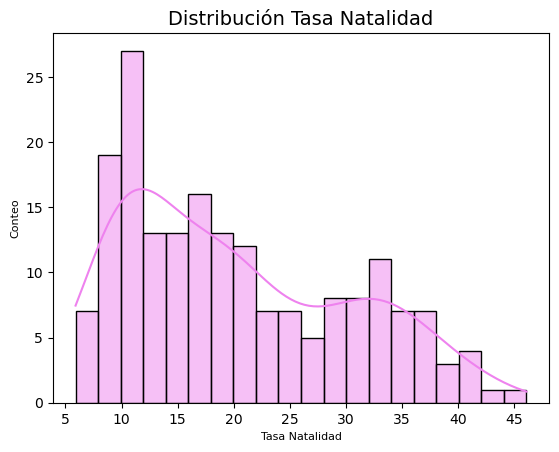

In [6]:
sns.histplot(x = "birth_rate", 
             data = df, 
             color = "violet", 
             kde = True, # crea una linea con el patrón
             bins = 20 ); # numero de barras
plt.title("Distribución Tasa Natalidad", fontsize = 14)
plt.xlabel("Tasa Natalidad", fontsize = 8);
plt.ylabel("Conteo", fontsize = 8);

¿Existe una relación aparente entre la tasa de mortalidad infantil y la esperanza de vida? Proporciona una breve descripción de los patrones que observes.

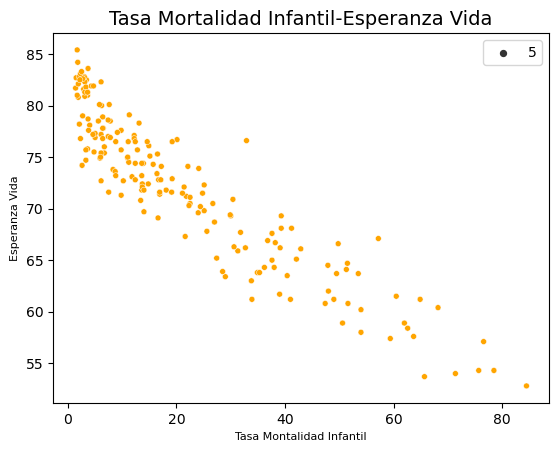

In [7]:
sns.scatterplot(x = "infant_mortality", 
                y = "life_expectancy",
                data = df,
                color = "orange",
                size = 5);
plt.title("Tasa Mortalidad Infantil-Esperanza Vida", fontsize = 14)
plt.xlabel("Tasa Montalidad Infantil", fontsize = 8);
plt.ylabel("Esperanza Vida", fontsize = 8);
# Si estan relacionadas, cuando aumenta la esperanza de vida la mortalidad disminuye.

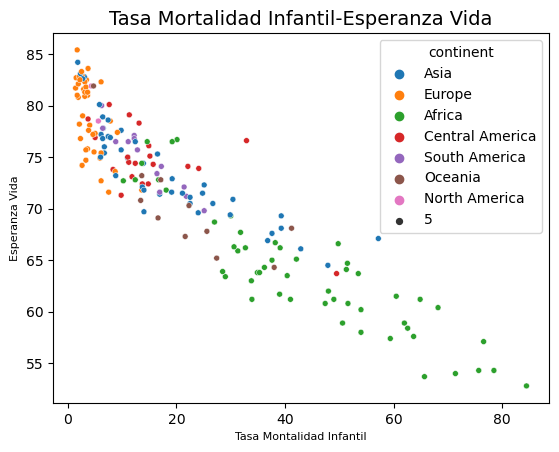

In [8]:
sns.scatterplot(x = "infant_mortality", 
                y = "life_expectancy",
                hue="continent",
                data = df,
                color = "orange",
                size = 5);
plt.title("Tasa Mortalidad Infantil-Esperanza Vida", fontsize = 14)
plt.xlabel("Tasa Montalidad Infantil", fontsize = 8);
plt.ylabel("Esperanza Vida", fontsize = 8);

¿Cuál es el continente con la mayor cantidad de países en el conjunto de datos? Proporciona el porcentaje de países en ese continente.

In [9]:
df_filtrado = df.groupby("continent")["country"].count().reset_index()

In [10]:
df_filtrado.head()

,continent,country
0,Africa,53
1,Asia,45
2,Central America,20
3,Europe,47
4,North America,2


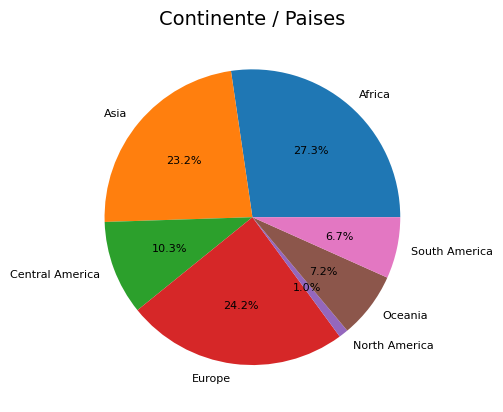

In [11]:
plt.pie("country", labels="continent",
        data =df_filtrado,
        autopct=  '%1.1f%%',
        textprops={'fontsize': 8})
plt.title("Continente / Paises", fontsize = 14);

In [12]:
df = pd.read_csv("world_data_full_apply_nul.csv", index_col = 0) 
df.sample(5)

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
153,Serbia,100.0,RS,39.3,77.474,32.0,9.20,381.0,Belgrade,45.221,144.00,1.8,RSD,1.49,31.1,1.16,5.140917e+10,100.3,67.2,4.8,Belgrade,75.5,12.0,1.57,Serbian,40.6,3.11,NaN,54.9,18.6,36.6,12.69,NaN,44.016521,21.005859,Europe
57,Ethiopia,115.0,ET,36.3,NaN,138.0,32.34,251.0,Addis Ababa,14.870,143.86,15.8,ETB,4.25,12.5,0.75,9.610766e+10,101.0,8.1,39.1,Addis Ababa,66.2,401.0,NaN,Amharic,37.8,0.08,NaN,79.6,7.5,37.7,2.08,NaN,9.145000,40.489673,Africa
172,Tanzania,67.0,TZ,44.8,947.300,28.0,36.70,255.0,Dodoma,11.973,187.43,3.5,TZS,4.89,51.6,0.87,6.317707e+10,94.2,4.0,37.6,Dar es Salaam,65.0,524.0,0.09,Swahili,26.1,0.01,NaN,83.4,11.5,43.8,1.98,NaN,-6.369028,34.888822,Africa
28,Ivory Coast,83.0,CI,64.8,322.463,27.0,35.74,225.0,Yamoussoukro,9.674,111.61,-0.9,XOF,4.65,32.7,0.93,5.879221e+10,99.8,9.3,59.4,Abidjan,57.4,617.0,0.36,French,36.0,0.23,NaN,57.0,11.8,50.1,3.32,NaN,7.539989,-5.547080,Africa
52,El Salvador,313.0,SV,76.4,21.041,42.0,18.25,503.0,San Salvador,7.169,111.23,0.1,NaN,2.04,12.6,0.83,2.702264e+10,94.8,29.4,11.8,San Salvador,73.1,46.0,0.50,Spanish,27.9,1.57,NaN,59.1,18.1,36.4,4.11,NaN,13.794185,-88.896530,Central America


¿Cuál es la mediana de la esperanza de vida en Europa? Proporciona un rango intercuartil aproximado y verifica si existen valores atípicos.

In [13]:
df_filtrado2 = df.groupby("continent")["life_expectancy"].median().reset_index()
df_filtrado2.head()

,continent,life_expectancy
0,Africa,63.60
1,Asia,73.05
2,Central America,74.45
3,Europe,80.90
4,North America,80.20


In [14]:
df_europa = df[df["continent"] == "Europe"]
df_europa.head()

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe
3,Andorra,164.0,AD,40.0,468.000,NaN,7.20,376.0,Andorra la Vella,469.000,NaN,NaN,EUR,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,Andorra la Vella,NaN,NaN,6.63,Catalan,36.4,3.33,77.142,NaN,NaN,NaN,NaN,67.873,42.506285,1.521801,Europe
9,Austria,109.0,AT,32.4,83.871,21.0,9.70,43.0,Vienna,61.448,118.06,1.5,EUR,1.47,46.9,1.20,4.463147e+11,103.1,85.1,2.9,Vienna,81.6,5.0,NaN,German,17.9,5.17,NaN,60.7,25.4,51.4,4.67,NaN,47.516231,14.550072,Europe
15,Belarus,47.0,BY,42.0,207.600,155.0,9.90,375.0,Minsk,58.280,NaN,5.6,BYN,1.45,42.6,0.60,6.308046e+10,100.5,87.4,2.6,Minsk,74.2,2.0,1.49,Russian,34.5,5.19,NaN,64.1,14.7,53.3,4.59,NaN,53.709807,27.953389,Europe
16,Belgium,383.0,BE,44.6,30.528,32.0,10.30,32.0,City of Brussels,96.889,117.11,1.4,EUR,1.62,22.6,1.43,5.296067e+11,103.9,79.7,2.9,Brussels,81.6,5.0,10.31,French,17.6,3.07,NaN,53.6,24.0,55.4,5.59,NaN,50.503887,4.469936,Europe


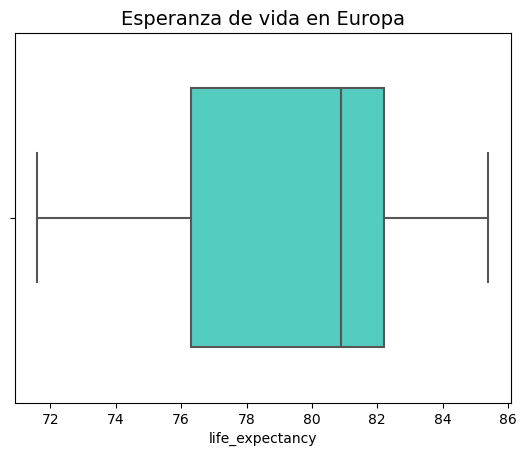

In [15]:
sns.boxplot(x="life_expectancy",
            data = df_europa,
            width=0.7,
            color="turquoise")
plt.title("Esperanza de vida en Europa", fontsize = 14);

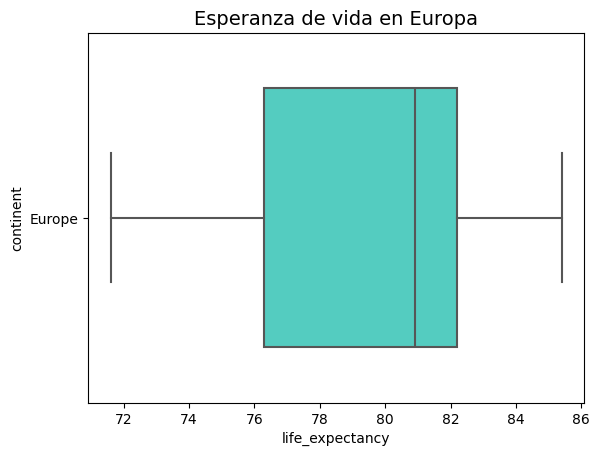

In [16]:
sns.boxplot(x="life_expectancy",
            y = "continent",
            data = df[df["continent"] == "Europe"],
            width=0.7,
            color="turquoise")
plt.title("Esperanza de vida en Europa", fontsize = 14);


¿Existen relaciones visibles entre la tasa de natalidad y las siguientes variables: tasa de mortalidad infantil, esperanza de vida, densidad de población y población urbana? Usa un subplot. Describe cualquier patrón que encuentres.

In [21]:
df.columns

Index(['country', 'density', 'abbreviation', 'agricultural_land', 'land_area',
       'armed_forces_size', 'birth_rate', 'calling_code', 'capital/major_city',
       'co2-emissions', 'cpi', 'cpi_change', 'currency-code', 'fertility_rate',
       'forested_area', 'gasoline_price', 'gdp',
       'gross_primary_education_enrollment',
       'gross_tertiary_education_enrollment', 'infant_mortality',
       'largest_city', 'life_expectancy', 'maternal_mortality_ratio',
       'minimum_wage', 'official_language', 'out_of_pocket_health_expenditure',
       'physicians_per_thousand', 'population',
       'population_labor_force_participation', 'tax_revenue', 'total_tax_rate',
       'unemployment_rate', 'urban_population', 'latitude', 'longitude',
       'continent'],
      dtype='object')

In [22]:
df.head()

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe
2,Algeria,18.0,DZ,17.4,NaN,317.0,24.28,213.0,Algiers,150.006,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,NaN,41.2,37.2,66.1,11.70,NaN,28.033886,1.659626,Africa
3,Andorra,164.0,AD,40.0,468.000,NaN,7.20,376.0,Andorra la Vella,469.000,NaN,NaN,EUR,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,Andorra la Vella,NaN,NaN,6.63,Catalan,36.4,3.33,77.142,NaN,NaN,NaN,NaN,67.873,42.506285,1.521801,Europe
4,Angola,26.0,AO,47.5,NaN,117.0,40.73,244.0,Luanda,34.693,261.73,17.1,AOA,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,Luanda,60.8,241.0,0.71,Portuguese,33.4,0.21,NaN,77.5,9.2,49.1,6.89,NaN,-11.202692,17.873887,Africa


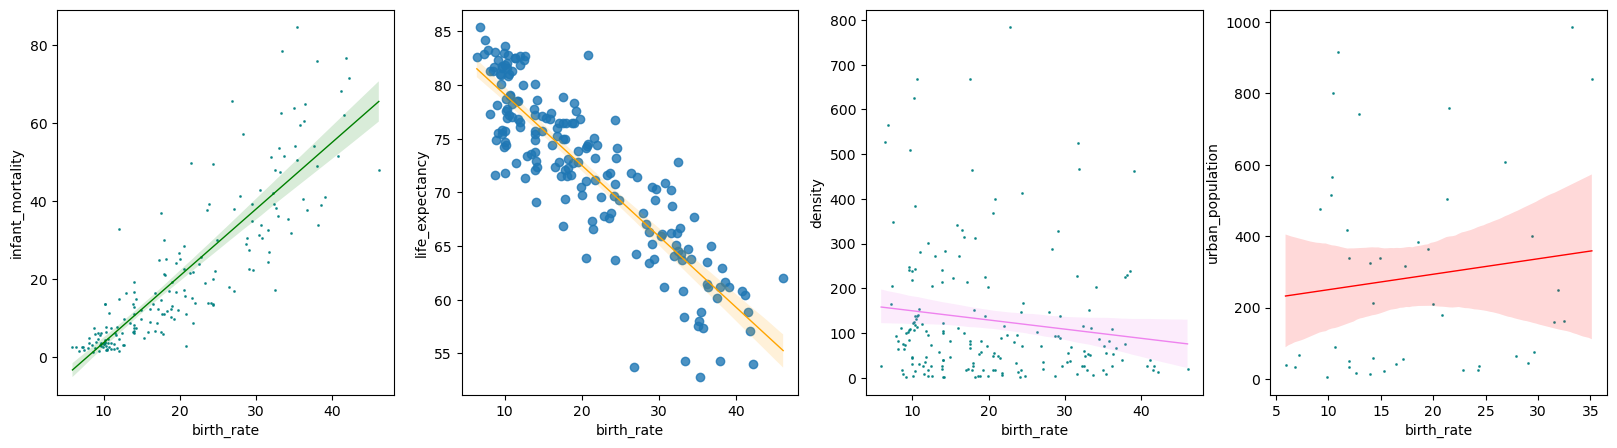

In [36]:
# comenzamos empezando estableciendo nuestra gráfica y indicando el número de filas y columnas que queremos
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (20,5))

sns.regplot(x = "birth_rate",
            y = "infant_mortality",
            data = df,
            ax = axes[0],
            line_kws = {"color":"green","linewidth": 1},
            scatter_kws = {"color": "teal", "s": 1})            

sns.regplot(x = "birth_rate",
               y = "life_expectancy",
               data = df,
               ax = axes[1],
               line_kws = {"color":"orange","linewidth": 1 })

sns.regplot(x = "birth_rate",
            y = "density",
            data = df,
            ax = axes[2],
            line_kws = {"color":"violet","linewidth": 1},
            scatter_kws = {"color": "teal", "s": 1})

sns.regplot(x = "birth_rate",
            y =  "urban_population",
            data = df,
            ax = axes[3],
            line_kws = {"color":"red","linewidth": 1},
            scatter_kws = {"color": "teal", "s": 1});


¿Cuáles son los 10 países con la mayor área forestal?

In [37]:
df.head()

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe
2,Algeria,18.0,DZ,17.4,NaN,317.0,24.28,213.0,Algiers,150.006,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,NaN,41.2,37.2,66.1,11.70,NaN,28.033886,1.659626,Africa
3,Andorra,164.0,AD,40.0,468.000,NaN,7.20,376.0,Andorra la Vella,469.000,NaN,NaN,EUR,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,Andorra la Vella,NaN,NaN,6.63,Catalan,36.4,3.33,77.142,NaN,NaN,NaN,NaN,67.873,42.506285,1.521801,Europe
4,Angola,26.0,AO,47.5,NaN,117.0,40.73,244.0,Luanda,34.693,261.73,17.1,AOA,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,Luanda,60.8,241.0,0.71,Portuguese,33.4,0.21,NaN,77.5,9.2,49.1,6.89,NaN,-11.202692,17.873887,Africa


In [46]:
df_country = df.groupby("country")["forested_area"].sum().sort_values(ascending=False).head(10).reset_index()
df_country

,country,forested_area
0,Suriname,98.3
1,Federated States of Micronesia,91.9
2,Gabon,90.0
3,Seychelles,88.4
4,Palau,87.6
5,Guyana,83.9
6,Laos,82.1
7,Solomon Islands,77.9
8,Papua New Guinea,74.1
9,Finland,73.1


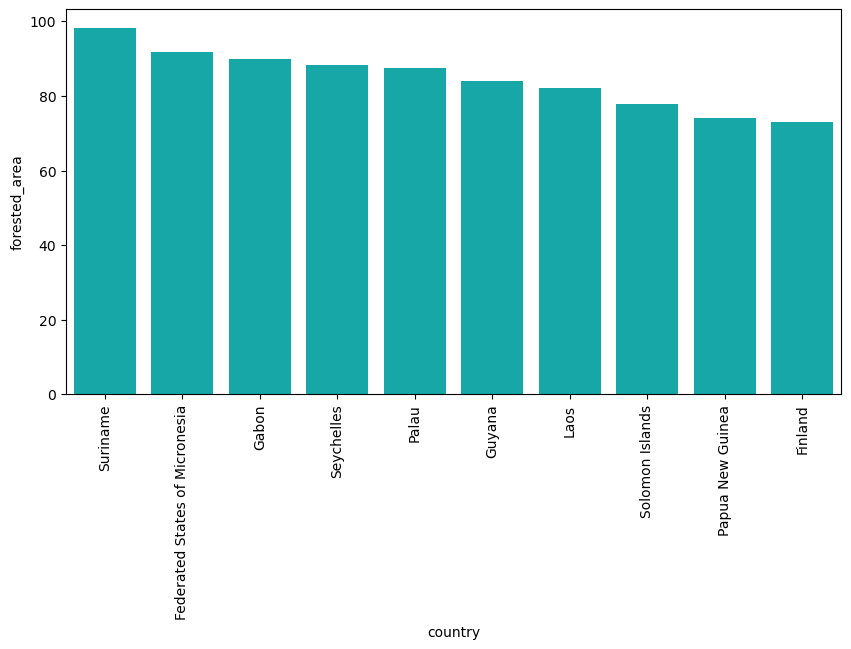

In [67]:
plt.figure(figsize=(10,5))
sns.barplot(x= "country",
            y = "forested_area",
              data = df_country,
              color = "c")
plt.xticks(rotation = 90);


(array([0.07936508, 0.03968254, 0.        , 0.03968254, 0.03968254,
        0.03968254, 0.07936508, 0.03968254, 0.        , 0.03968254]),
 array([73.1 , 75.62, 78.14, 80.66, 83.18, 85.7 , 88.22, 90.74, 93.26,
        95.78, 98.3 ]),
 <BarContainer object of 10 artists>)

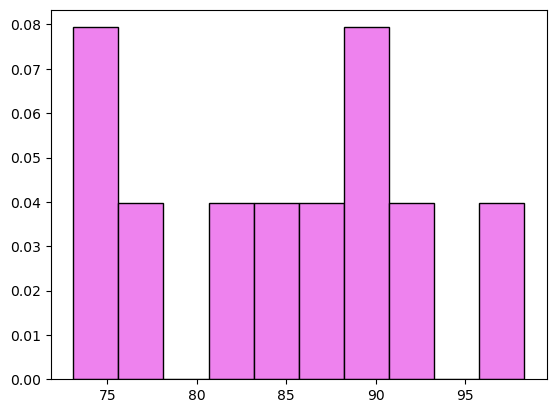

In [52]:
sns.catplot(x= "forested_area",
         data= df_country,         
         color = "violet",
         edgecolor = "black")